# Mnist(digits) and Fashion Minst Dataset 

In [22]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax

from tensorflow.keras.datasets.mnist import load_data 

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
import seaborn as sns 

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

In [27]:
#loading the MNIST Dataset 

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [28]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualization and Preprocessing

In [29]:
#reshaping train and test sets 

train_x = train_x.reshape((train_x.shape[0], train_x.shape[1], train_x.shape[2], 1))

test_x = test_x .reshape((test_x.shape[0], test_x.shape[1], test_x.shape[2], 1))

In [30]:
#printing the shapes 

print(train_x.shape, train_y.shape)

print(test_x.shape , test_y.shape)

 

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [31]:
#normalizing the pixel values of images 

train_x = train_x.astype('float32')/255.0

test_x = test_x.astype('float32')/255.0

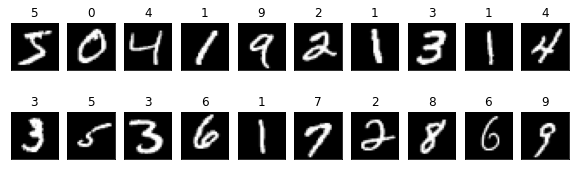

In [32]:
#plotting images of dataset 

fig = plt.figure(figsize = (10,3))

for i in range(20):

    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(train_x[i]), cmap='gray')

    ax.set_title(train_y[i])

In [33]:
shape = train_x.shape[1:]

shape

(28, 28, 1)

In [34]:
#CNN Model 

model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

In [36]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

x=model.fit(train_x, train_y, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 41s - loss: 0.2508 - accuracy: 0.9226 - val_loss: 0.0638 - val_accuracy: 0.9828 - 41s/epoch - 97ms/step
Epoch 2/10
422/422 - 54s - loss: 0.0835 - accuracy: 0.9735 - val_loss: 0.0412 - val_accuracy: 0.9900 - 54s/epoch - 127ms/step
Epoch 3/10
422/422 - 56s - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0382 - val_accuracy: 0.9903 - 56s/epoch - 132ms/step
Epoch 4/10
422/422 - 56s - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.0322 - val_accuracy: 0.9902 - 56s/epoch - 132ms/step
Epoch 5/10
422/422 - 50s - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0315 - val_accuracy: 0.9908 - 50s/epoch - 118ms/step
Epoch 6/10
422/422 - 52s - loss: 0.0375 - accuracy: 0.9876 - val_loss: 0.0274 - val_accuracy: 0.9928 - 52s/epoch - 122ms/step
Epoch 7/10
422/422 - 54s - loss: 0.0327 - accuracy: 0.9890 - val_loss: 0.0279 - val_accuracy: 0.9923 - 54s/epoch - 129ms/step
Epoch 8/10
422/422 - 52s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0286 - val_accuracy: 0.9915 - 52s/epoch - 124m

# confusion matrix

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
y_pred = model.predict(test_x)

313/313 [==============================] - 3s 8ms/step


In [40]:
from sklearn.metrics import confusion_matrix


confusion=confusion_matrix(test_y, np.argmax(y_pred,axis=1))


In [41]:
print(confusion)

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1132    0    2    0    0    1    0    0    0]
 [   0    0 1024    1    1    0    0    5    1    0]
 [   0    0    1 1007    0    1    0    1    0    0]
 [   0    0    0    0  976    0    1    0    0    5]
 [   1    0    1    7    0  880    1    1    0    1]
 [   5    2    0    0    1    3  947    0    0    0]
 [   0    2    2    0    0    0    0 1021    1    2]
 [   1    0    3    2    0    0    0    1  965    2]
 [   0    1    0    1    4    2    0    2    0  999]]


<AxesSubplot:>

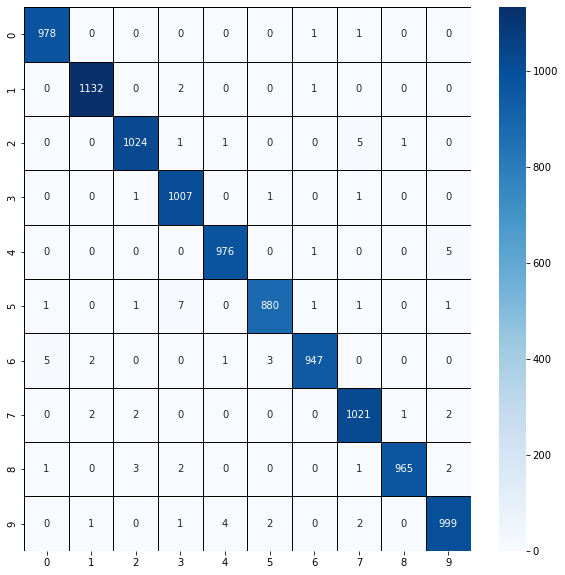

In [42]:
plt.figure(figsize = (10,10))
sns.heatmap(confusion,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [43]:
loss, accuracy= model.evaluate(test_x, test_y, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 99.2900013923645


# classification report 

In [44]:
c =classification_report(test_y, np.argmax(y_pred,axis=1))

In [45]:
print(c)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
#norlmal
def plot_metric(x, metric):
    train_metrics = x.history[metric]
    val_metrics = x.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

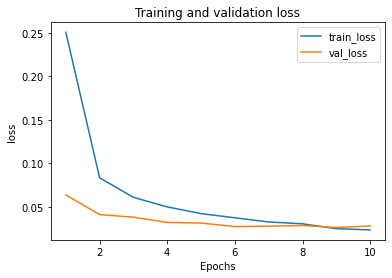

In [47]:
plot_metric(x, 'loss')

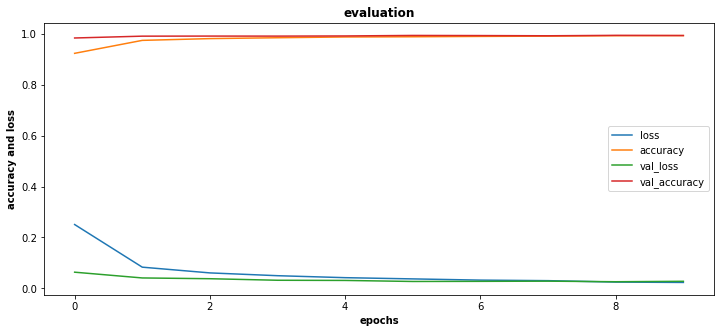

In [48]:
pd.DataFrame(x.history).plot(figsize=(12,5))
plt.title("evaluation",fontweight="bold")
plt.xlabel("epochs",fontweight="bold")
plt.ylabel("accuracy and loss",fontweight="bold")
plt.show()

# ImageDataGenerator

In [49]:
gen =ImageDataGenerator(rotation_range=8,width_shift_range=64)
test_gen=ImageDataGenerator()

In [50]:
train_gen=gen.flow(train_x, train_y,batch_size=64)
test_gen=gen.flow(test_x, test_y,batch_size=64)

In [51]:
from keras.callbacks import EarlyStopping
callsbacks=[EarlyStopping(monitor="val_accuracy",patience=3)]
history=model.fit_generator(train_gen,steps_per_epoch=60000//64,epochs=5,validation_data=test_gen,validation_steps=1000//64)

Epoch 1/5


C:\Users\DELL\AppData\Local\Temp/ipykernel_19912/3546517828.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen,steps_per_epoch=60000//64,epochs=5,validation_data=test_gen,validation_steps=1000//64)


937/937 [==============================] - 68s 72ms/step - loss: 1.8793 - accuracy: 0.2863 - val_loss: 1.7700 - val_accuracy: 0.3083
Epoch 2/5
937/937 [==============================] - 71s 75ms/step - loss: 1.7669 - accuracy: 0.3241 - val_loss: 1.7278 - val_accuracy: 0.3458
Epoch 3/5
937/937 [==============================] - 68s 72ms/step - loss: 1.7410 - accuracy: 0.3319 - val_loss: 1.7186 - val_accuracy: 0.3479
Epoch 4/5
937/937 [==============================] - 72s 77ms/step - loss: 1.7266 - accuracy: 0.3383 - val_loss: 1.7121 - val_accuracy: 0.3333
Epoch 5/5
937/937 [==============================] - 73s 78ms/step - loss: 1.7150 - accuracy: 0.3416 - val_loss: 1.7448 - val_accuracy: 0.3292


In [52]:
gen =ImageDataGenerator(rotation_range=8,width_shift_range=64)
test_gen=ImageDataGenerator()

In [53]:
#imagegenertor

def plot_metric(x, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

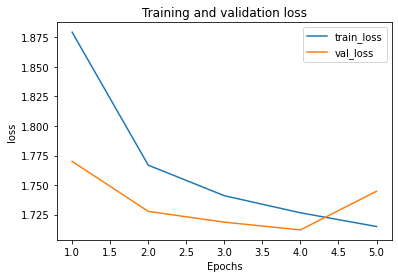

In [54]:
plot_metric(history, 'loss')

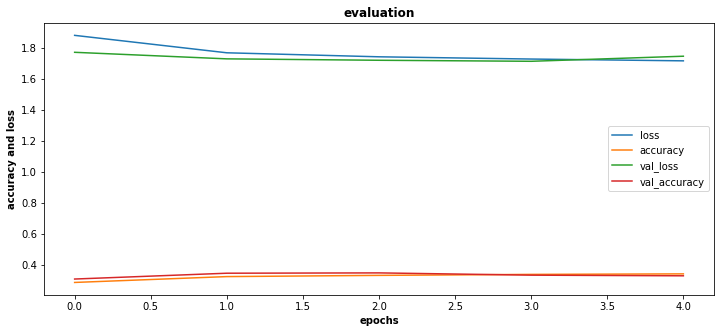

In [55]:

pd.DataFrame(history.history).plot(figsize=(12,5))
plt.title("evaluation",fontweight="bold")
plt.xlabel("epochs",fontweight="bold")
plt.ylabel("accuracy and loss",fontweight="bold")
plt.show()

In [56]:
y_pred = model.predict(test_gen)

ValueError: Failed to find data adapter that can handle input: <class 'keras.preprocessing.image.ImageDataGenerator'>, <class 'NoneType'>

In [ ]:
confusion =confusion_matrix(test_y, np.argmax(y_pred,axis=1))


In [ ]:
sns.heatmap(confusion, annot=True, fmt="d", cbar=False, xticklabels=['benign', 'malignant'], yticklabels=['benign', 'malignant'])


In [ ]:
print(confusion)

In [ ]:
c =classification_report(test_y, np.argmax(y_pred,axis=1))

In [ ]:
print(c)

In [ ]:
loss, accuracy= model.evaluate(test_gen, verbose = 0)

print(f'Accuracy: {accuracy*100}')

## PROBLEM STATEMENT

*Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows: 0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255*

# fashion mnist dataset

In [23]:
import numpy as np

import pandas as pd 

from numpy import unique, argmax
import keras

#from tensorflow.keras import r

from tensorflow.keras.layers import Conv2D

from tensorflow.keras.layers import MaxPool2D
import seaborn as sns 

from tensorflow.keras.layers import Dense 

from tensorflow.keras.layers import Flatten 

from tensorflow.keras.layers import Dropout 

from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization

# fashion minst data set

In [24]:
#loading the MNIST Dataset 
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [27]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Visualization and Preprocessing

In [28]:
X_train= X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))

X_test = X_test .reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [29]:
#printing the shapes 

print(X_train.shape,y_train.shape)

print(X_test.shape ,y_test.shape)

 

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [30]:
#normalizing the pixel values of images 

X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

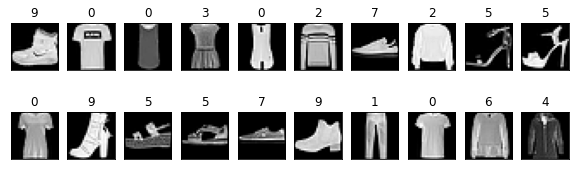

In [31]:
#plotting images of dataset 

fig = plt.figure(figsize = (10,3))

for i in range(20):

    ax= fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(X_train[i]), cmap='gray')

    ax.set_title(y_train[i])

In [32]:
shape = X_train.shape[1:]

shape

(28, 28, 1)

# CNN Model

In [33]:
# 
model = Sequential()

#adding convolutional layer 

model.add(Conv2D(32, (3,3), activation='relu', input_shape= shape))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(48, (3,3), activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(500, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [34]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [35]:
#compiling model 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',metrics= ['accuracy'] )

history=model.fit(X_train,y_train, epochs=10, batch_size = 128, verbose= 2 , validation_split = 0.1)

Epoch 1/10
422/422 - 38s - loss: 0.5812 - accuracy: 0.7900 - val_loss: 0.3887 - val_accuracy: 0.8582 - 38s/epoch - 91ms/step
Epoch 2/10
422/422 - 48s - loss: 0.4027 - accuracy: 0.8539 - val_loss: 0.3285 - val_accuracy: 0.8805 - 48s/epoch - 114ms/step
Epoch 3/10
422/422 - 51s - loss: 0.3486 - accuracy: 0.8732 - val_loss: 0.3202 - val_accuracy: 0.8780 - 51s/epoch - 122ms/step
Epoch 4/10
422/422 - 47s - loss: 0.3161 - accuracy: 0.8849 - val_loss: 0.2728 - val_accuracy: 0.8987 - 47s/epoch - 111ms/step
Epoch 5/10
422/422 - 47s - loss: 0.2951 - accuracy: 0.8902 - val_loss: 0.2652 - val_accuracy: 0.8998 - 47s/epoch - 110ms/step
Epoch 6/10
422/422 - 46s - loss: 0.2765 - accuracy: 0.8969 - val_loss: 0.2674 - val_accuracy: 0.9015 - 46s/epoch - 110ms/step
Epoch 7/10
422/422 - 46s - loss: 0.2623 - accuracy: 0.9029 - val_loss: 0.2419 - val_accuracy: 0.9102 - 46s/epoch - 110ms/step
Epoch 8/10
422/422 - 46s - loss: 0.2496 - accuracy: 0.9060 - val_loss: 0.2590 - val_accuracy: 0.9002 - 46s/epoch - 108m

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
y_pred = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


# confusion matrix

In [45]:
 
confusion2=confusion_matrix(y_test, np.argmax(y_pred,axis=1))


In [46]:
print(confusion2)

[[821   0  15  20   4   1 133   0   6   0]
 [  1 981   1  12   2   0   1   0   2   0]
 [ 12   0 854   9  69   0  55   0   1   0]
 [  4   3   8 932  24   0  29   0   0   0]
 [  1   0  48  35 867   0  49   0   0   0]
 [  0   0   0   0   0 990   0   9   0   1]
 [ 83   0  63  29  96   0 718   0  11   0]
 [  0   0   0   0   0  25   0 967   0   8]
 [  1   1   3   2   4   5   3   4 977   0]
 [  1   0   0   0   0  15   0  61   0 923]]


<AxesSubplot:>

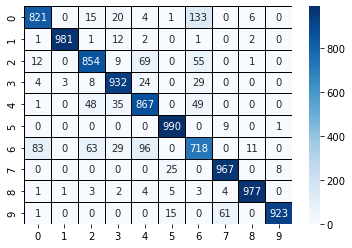

In [47]:
sns.heatmap(confusion2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# classification report

In [48]:
c =classification_report(y_test, np.argmax(y_pred,axis=1))

In [49]:
print(c)

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       1.00      0.98      0.99      1000
           2       0.86      0.85      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.81      0.87      0.84      1000
           5       0.96      0.99      0.97      1000
           6       0.73      0.72      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.92      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [50]:
loss, accuracy= model.evaluate(X_test,y_test, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 90.2999997138977


# traing and loss graph

In [51]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

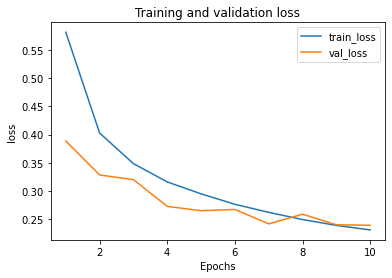

In [52]:
plot_metric(history,"loss")

# Evalutation

In [55]:
# get the predictions for the test data
y_pred = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step
